# Introduction

In this computational notebook I attempt to explain variance using an imaginary six sideded die, and python.

The following block of code tells the computer to prepare certain modules that I'll be using in this notebook.

You can use the button below to load this notebook into a service called mybinder if you want to re-run it and change things.

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/detrout/hamilton_science_fair/HEAD?labpath=variance-demo.ipynb)

If you're exploring the notebook, it's probably best to go to the run menu and pick "Run all cells" first and then after it's done, you can click on a code block and press shift enter to rerun it. 

In [1]:
import random
from matplotlib import pyplot
import seaborn
import pandas
import numpy

Imagine a normal 6 sided die.  

To tell the computer what a die looks like, I create a list with the numbers 1 through 6.

In [2]:
die = [1, 2, 3, 4, 5, 6]

To "roll" the die in the computer I use the function `random.choice` to randomly pick an element of the list. Each time this is re-run you'll usually get a different number. (There's only 6 choices so 1 in 6 times you'll get the same number).

In [3]:
print(random.choice(die))

4


In normal day to day game playing we don't roll it that much so you it can "roll high" or "roll low".

The way this block of code works is it defines an empty list `rolls = []`, and then repeats while the length of the list is less than 3 (`while len(rolls) < 3`). Each time through it adds a random die roll to the end of the list. `rolls.append()`

Afterwards it prints the die rolls, makes a plot of the number of times it saw each number, and computes the mean.

[5, 6, 3]
Mean 4.666666666666667


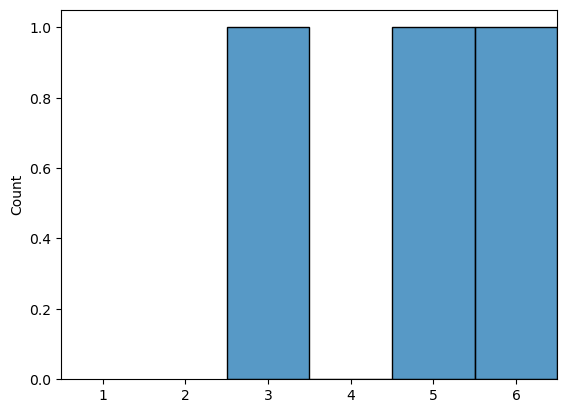

In [4]:
rolls = []
while len(rolls) < 3:
    rolls.append(random.choice(die))

# print the list
print(rolls)

# make the plot, making sure the 1 through 6 always show up.
ax = seaborn.histplot(rolls, stat="count", discrete=True)
ax.set_xlim(0.5,6.5)

# print the average
print("Mean", sum(rolls)/len(rolls))

But as you roll more often everything starts to average out. So here I roll 100 times, which is too many to pritn. But You can start to see how the odds of getting any particular number starts to become more equal.

In this case there's a way to calculate what the expected value you'll get after many rolls, which for this kind of die roll is just the average of the minimum and maximum value.

$\frac{1 + 6}{2} = \frac{7}{2} = 3 \frac{1}{2}$

It happens that calculators don't like fractions and so use "decimal" notation. which is like the place value of whole numbers, but in reverse. Since we want to keep everything in base ten.

The first number to the right decimal point is $\frac{x}{10}$, the second number to the right is $\frac{x}{100}$ (and so forth).

So the $\frac{1}{2}$ can be converted to $\frac{5}{10}$ which is $0.5$.

So $3 \frac{1}{2}$ can be written as $3.5$

Mean 3.36


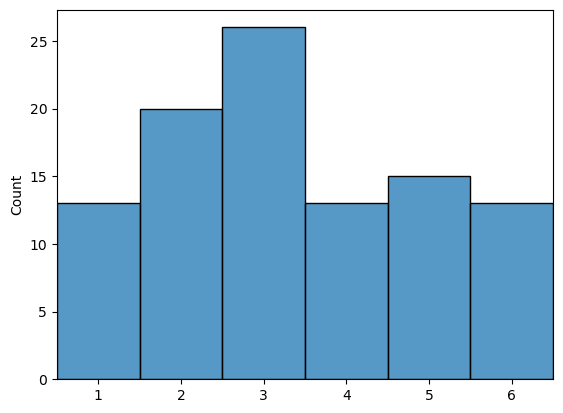

In [5]:
rolls = []
while len(rolls) < 100:
    rolls.append(random.choice(die))

ax = seaborn.histplot(rolls, stat="count", discrete=True)
ax.set_xlim(0.5,6.5)
print("Mean", sum(rolls)/len(rolls))

If we go up to 10,000 rolls, it's getting very evenly distributed.

Mean 3.5129


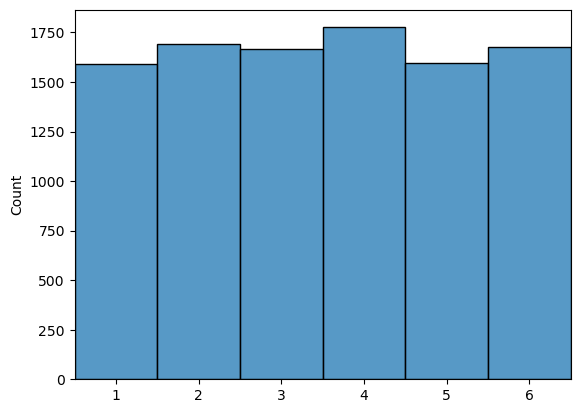

In [6]:
rolls = []
while len(rolls) < 10000:
    rolls.append(random.choice(die))

ax = seaborn.histplot(rolls, stat="count", discrete=True)
ax.set_xlim(0.5,6.5)
print("Mean", sum(rolls)/len(rolls))

But what if we use biased dice where everything number doesn't have an equal chance.

For this extreme die, it can only roll a 1 or a 6. but still with equal odds.

In [7]:
die_extreme = [1,1,1,6,6,6]

Mean 3.482


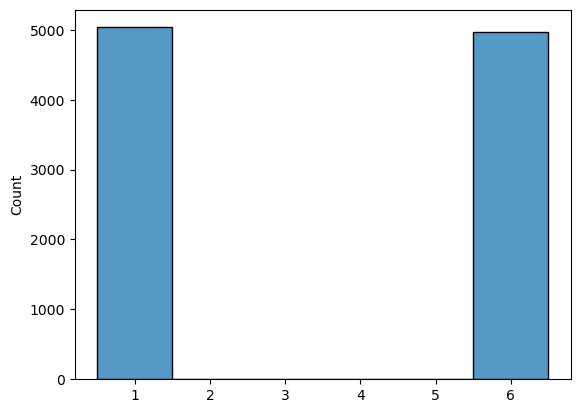

In [8]:
rolls_extreme = []
while len(rolls_extreme) < 10000:
    rolls_extreme.append(random.choice(die_extreme))

_ = seaborn.histplot(rolls_extreme, stat="count", discrete=True)
print("Mean", sum(rolls_extreme)/len(rolls_extreme))

Here you can see the range of values is much more extreme than the die with all the numbers 1 through 6. But! the average is still about $3.5$

Now we'll try another die that can only roll 3 or 4

Mean 3.4979


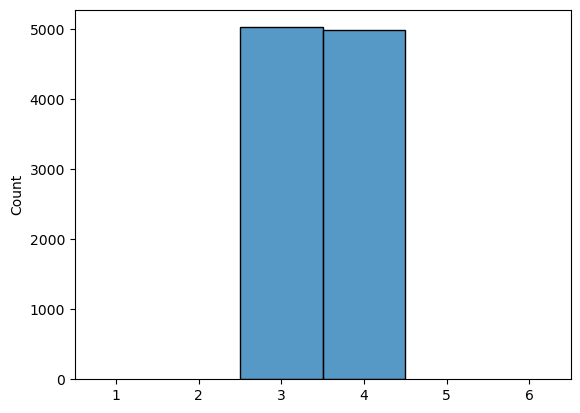

In [9]:
die_narrow = [3,3,3,4,4,4]

rolls_narrow = []
while len(rolls_narrow) < 10000:
    rolls_narrow.append(random.choice(die_narrow))

ax = seaborn.histplot(rolls_narrow, stat="count", discrete=True)
ax.set_xlim(0.5,6.5)
print("Mean", sum(rolls_narrow)/len(rolls_narrow))

In every case rolling each one of these dies thousands of times gives the same average of about 3 $\frac{1}{2}$

But their variance is different, using a standard deviation calculation. (numpy.std calculates the standard deviation, and numpy.round is rounding to make the numbers look easier to read.)

In [10]:
print("fair die mean",    numpy.mean(rolls),         "standard deviation", numpy.round(numpy.std(rolls), 2))
print("extreme die mean", numpy.mean(rolls_extreme), "standard deviation", numpy.round(numpy.std(rolls_extreme), 2))
print("narrow die mean",  numpy.mean(rolls_narrow),  "standard deviation", numpy.round(numpy.std(rolls_narrow), 2))

fair die mean 3.5129 standard deviation 1.69
extreme die mean 3.482 standard deviation 2.5
narrow die mean 3.4979 standard deviation 0.5


You can see how the mean for all 3 dies is about the same, but the standard deviations are quite different for each die.

# Bonus advanced concepts.

What happens if the odds aren't equal?

Mean 3.9976
standard deviation 2.08


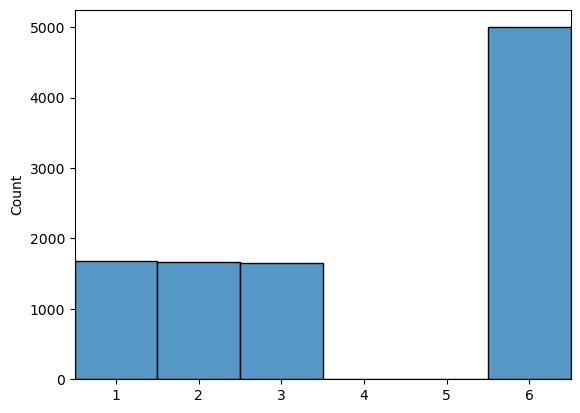

In [11]:
biased_die = [1,2,3,6,6,6]

rolls_biased = []
while len(rolls_biased) < 10000:
    rolls_biased.append(random.choice(biased_die))

ax = seaborn.histplot(rolls_biased, stat="count", discrete=True)
ax.set_xlim(0.5,6.5)
print("Mean", numpy.mean(rolls_biased))
print("standard deviation", numpy.round(numpy.std(rolls_biased), 2))

Here the standard deviation looks like the my first extreme die. but the mean is higher.